In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split    
x=df.iloc[:,2:4].values
y=df.iloc[:,-1].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=4)
classifier.fit(X_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [15]:
y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)*100}%")

Accuracy Score: 90.0%


In [16]:
confusion_matrix(y_test,y_pred)

array([[59,  4],
       [ 6, 31]])

<Axes: >

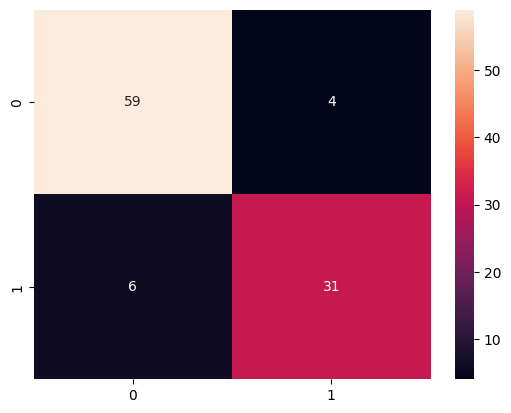

In [17]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

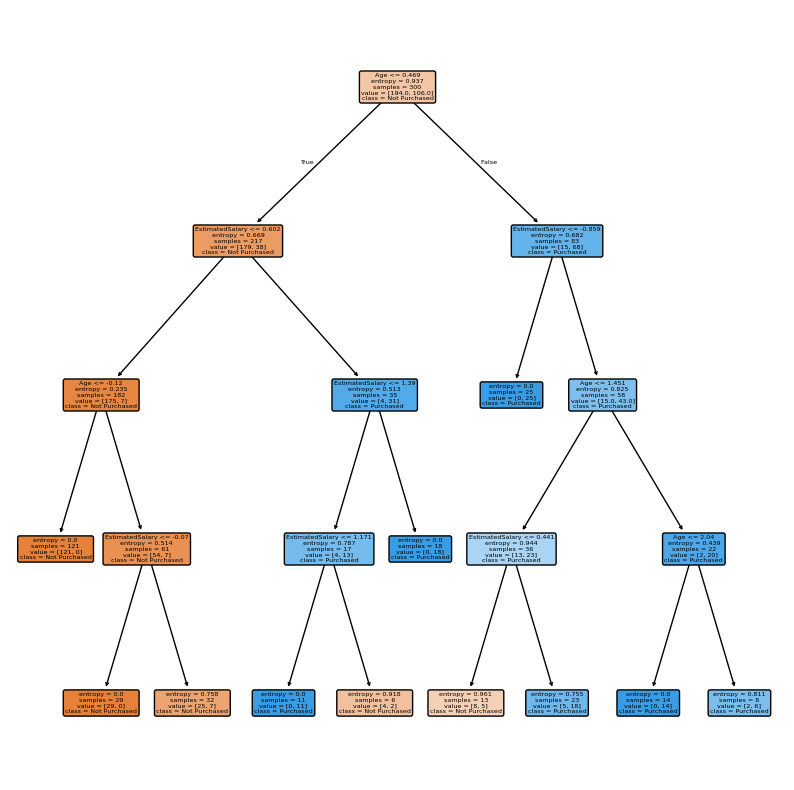

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plot_tree(classifier,feature_names=['Age','EstimatedSalary'],class_names=['Not Purchased','Purchased'],filled=True,rounded=True)
plt.show()
